# 房价预测

我们选择的是StatLib的加州房产价格数据集。

利用加州普查数据，建立一个加州房价模型，这个数据包含每个街区组的人口、收入的中位数、房价中位数等指标。

街区组是美国调查局发布样本数据的最小地理单位（600到3000人），简称“街区”。

In [1]:
# 导入相关包
import pandas as pd
import os

INPUT_PATH = './' # 输入目录  ./代表当前目录
def load_data(file, path=INPUT_PATH):
    """  
        加载csv文件
    """
    csv_path=os.path.join(path, file)
    return pd.read_csv(csv_path)


In [2]:
# 首先我们看下数据，发现有10个属性
#10个属性：经度、维度、房屋年龄中位数、总房间数、总卧室数、人口数、家庭数、收入中位数、房屋价值中位数、离大海距离
housing = load_data("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# info() 方法可以快速查看数据的描述，特别是总行数、每个属性的类型和非空值的数量
# total_bedrooms 有部分缺失  只有 ocean_proximity 属性不是数值属性
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#value_counts()方法查看该项中都有哪些类别
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
# describe()方法展示给数值属性的统计信息
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


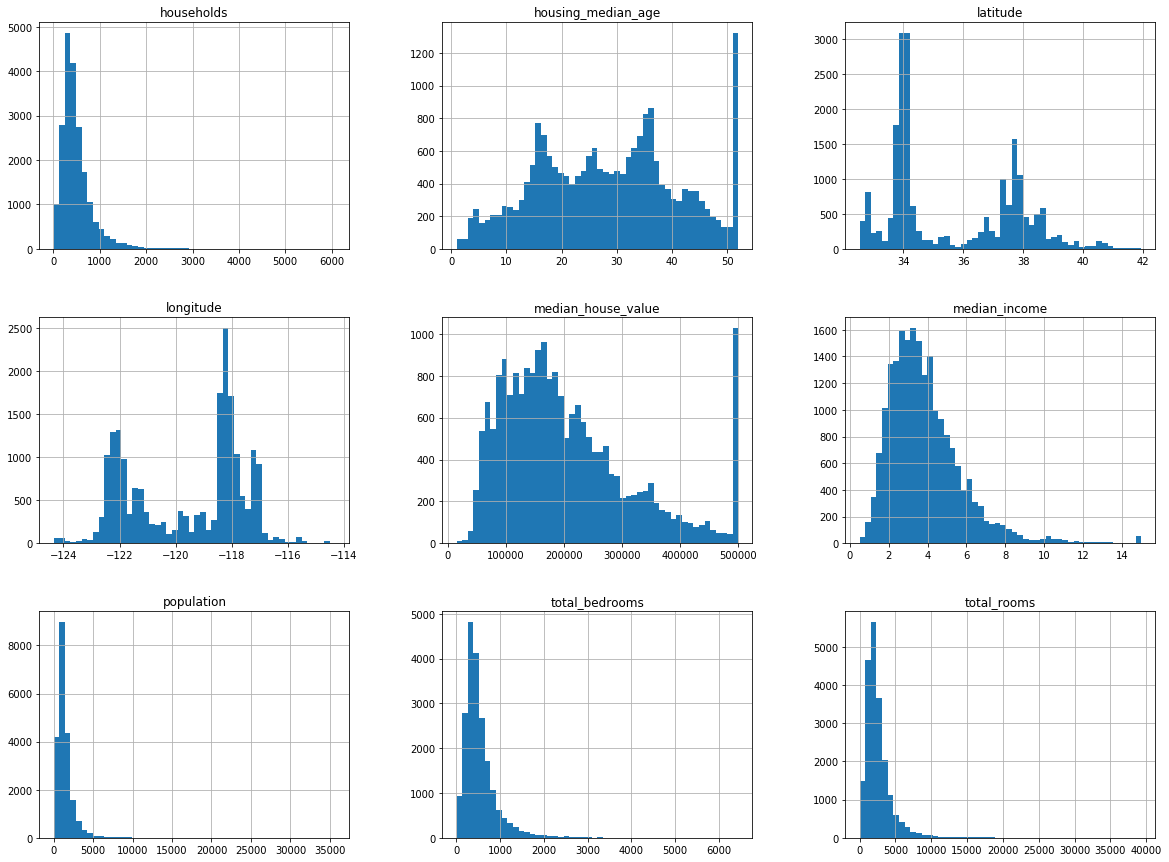

In [6]:
# 观察每个数值属性的柱状图
# DataFrame.hist(bins,figsize)：简单迅速的画出某一列中的值的分布直方图
# bins指bin(箱子)的个数，即每张图柱子的个数
# figsize指每张图的尺寸大小
import matplotlib.pyplot as plt
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
plt.show()

常用**数据划分**方法：

- **K折交叉验证**（`sklearn.model_selection.KFold`）：1)将所有训练集S划分为k个不相交的子集，假设S中训练样本数为`m`，那么每个子集有`m/k`个训练样本，相应子集称为{s1,s2,...,sk}； 2）每次从分好的子集中，拿出一个座位测试集，其他k-1个作为训练集； 3）在k-1个训练集上训练模型；4）把模型放在测试集上，得到分类率；5）计算k次求得的分类率的平均值，作为该模型的分类率。
> 该方法计算繁琐，需要训练k次，测试k次。

- **留一法**（`sklearn.model_selection.LeaveOneOut()`）：假设有N个样本，将每一个样本作为测试样本，其他N-1个样本作为训练样本。这样得到N个分类器，N个测试结果。
>留一法和KFold对比，留一法在N个样本上建立了N个模型，N个模型都是在N-1个样本上训练的，所以当k<<N时，留一法比k-fold更耗时。
>相应的还有留P法验证(`sklearn.model_selection.LeavePOut()`)，即有N个样本，将每P个样本作为测试样本，其他N-P个样本作为训练样本。当P>1时，测试集会发生重叠。

- **随机划分法**（`sklearn.model_selection.ShuffleSplit`）：产生指定数量的独立的train/test数据集，首先对样本**全体随机打乱**，然后再划分出train/test对。可以用随机数种子random_state来控制随机数序列发生器使运算结果**可重现**。`sklearn.model_selection.StratifiedShuffleSplit`是`ShuffleSplit`的变体，返回分层划分，就是在划分的时候保证每个划分中，类的样本比例与整体数据集中的原始比例保存一致。

In [7]:
# 创建测试集 ，为了防止采样偏差，这里使用分层采样
# 测试集通常被忽略，但实际是机器学习非常重要的一部分。
import numpy as np
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


#将收入中位数除以1.5（以限制收入分类的数量），创建了一个收入类别属性，
#用ceil对值舍入（以产生离散的分类）
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)

然后将所有大于5的分类归入到分类5

`DataFrame.where(cond, other=nan, inplace=False, axis=None, level=None, try_cast=False, raise_on_error=True)`

- `inplace` : boolean, default False.Whether to perform the operation in place on the data
- `axis` : alignment axis if needed, default None


In [8]:
housing["income_cat"].where(housing["income_cat"] < 5, other=5.0, inplace= True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


进行数据集的划分

`StratifiedShuffleSplit(n_splits=10,test_size=None,train_size=None, random_state=None)`
- `n_splits`是将训练数据分成train/test对的组数，可根据需要进行设置，默认为10
- `test_size`和`train_size`是用来设置train/test对中train和test所占的比例
- `random_state`将样本随机打乱。
> 一个整数或者一个RandomState实例，或者None:
  如果为整数，则它指定随机数生成器的种子;
  如果为RandomState实例，则指定随机数生成器;
  如果为None，则使用默认的随机数生成器np.random

In [9]:
#split(X, y) ：按照y的值将数据集分为训练集或测试集，保证训练集和测试集中各类y值所占的比例与原数据集相同。
#这一步的目的是考虑房屋数据集中地区收入在房价中占很重要的作用，想分开的训练集和测试集中各种收入所占的比重与原数据集中所占的比重相同。
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=41)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

"""
删除income_cat属性：
DataFrame.drop(labels=None, axis=0, index=None, columns=None, inplace=False)
labels：要删除的行/列的名字，用列表给出
axis：默认为0，即删除行，删除列时指定为1
index：直接指定要删除的行
columns：直接指定要删除的列
inplace：默认为False，即删除操作不改变元数据，而是返回一个执行删除操作后的新DataFrame，若为True，则会在元数据据上进行删除操作，删除后无法返回

"""
for set in (strat_train_set, strat_test_set):  
    set.drop(["income_cat"], axis=1, inplace=True)

# 分层采样就是按照这里给的 income_cat 分类比例来的
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

## 探索性数据分析

用pandas的画图函数`pandas.DataFrame.plot( )`进行探索性数据分析更加直观。

```python
DataFrame.plot(x=None, y=None, kind='line', ax=None, subplots=False, 
                sharex=None, sharey=False, layout=None,figsize=None, 
                use_index=True, title=None, grid=None, legend=True, 
                style=None, logx=False, logy=False, loglog=False, 
                xticks=None, yticks=None, xlim=None, ylim=None, rot=None,
                xerr=None,secondary_y=False, sort_columns=False, **kwds)
```

参数解释：

- `x` : label or position, default None。指数据框列的标签或位置参数
- `y` : label or position, default None
- `kind` :str
```python
"""
‘line’ : line plot (default)#折线图
‘bar’ : vertical bar plot#条形图
‘barh’ : horizontal bar plot#横向条形图
‘hist’ : histogram#柱状图
‘box’ : boxplot#箱线图
‘kde’ : Kernel Density Estimation plot#Kernel 的密度估计图，主要对柱状图添加Kernel 概率密度线
‘density’ : same as ‘kde’
‘area’ : area plot#不了解此图
‘pie’ : pie plot#饼图
‘scatter’ : scatter plot#散点图  需要传入columns方向的索引
"""
```
- 


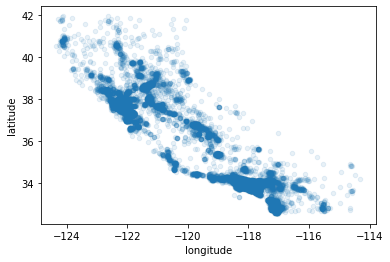

In [10]:
# 从经度和纬度查看密度分布
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude",y="latitude", alpha=0.1) #alpha是点的不透明度
plt.show()

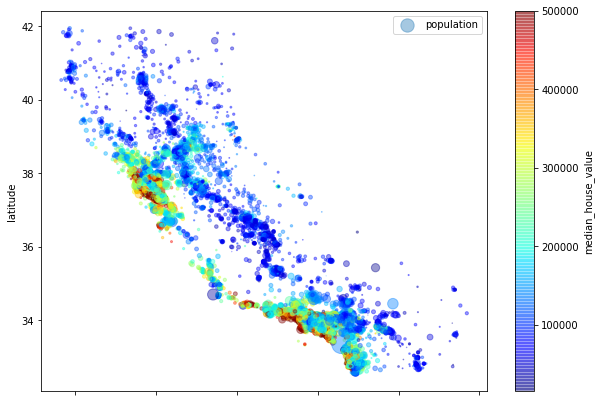

In [11]:
#用点的大小代表人口数量（参数s）
#用颜色代表价格（参数c）
#jet预定义颜色表（参数cmap）
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()
plt.show()
#  这张图可以看出房价和 靠海位置和人口密度联系密切

In [12]:
# 通过皮尔逊相关系数 查找关联
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
# 可以看出。收入中位数与房屋价格中位数相关性最高

median_house_value    1.000000
median_income         0.687668
total_rooms           0.131987
housing_median_age    0.111686
households            0.063285
total_bedrooms        0.046671
population           -0.024677
longitude            -0.049897
latitude             -0.141620
Name: median_house_value, dtype: float64

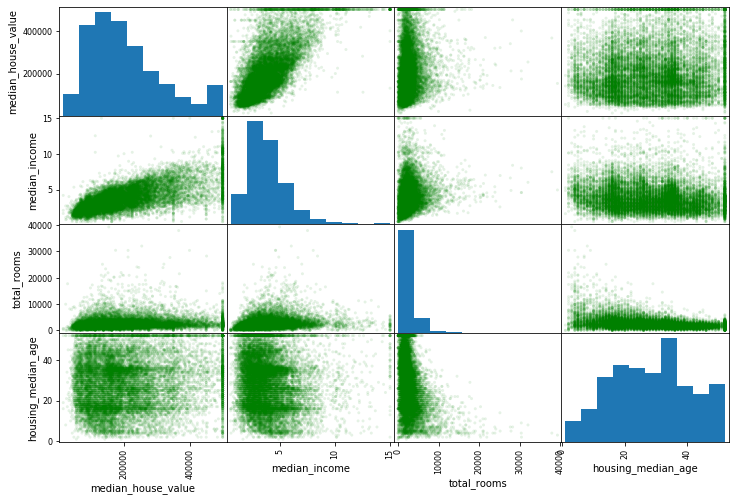

In [13]:
# scatter_matrix函数画出每个数值属性对每个其它数值属性的图
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8),color='green',alpha=0.1)
plt.show()

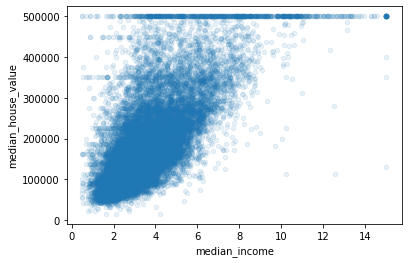

In [14]:
#与房屋价格中位数最相关的是收入中位数，放大查看这两个属性的相关性
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show()

In [15]:
# 属性组合,尝试创建各种属性的组合，观察新的属性与目标值之间的相关性。
# 我们真正需要的是每户有几个房间
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
# 总卧室与总房间的占比
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
# 每户人口数
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
#表明新属性bedrooms_per_room比原始属性total_bedrooms和total_rooms更有价值。

median_house_value          1.000000
median_income               0.687668
rooms_per_household         0.155908
total_rooms                 0.131987
housing_median_age          0.111686
households                  0.063285
total_bedrooms              0.046671
population                 -0.024677
population_per_household   -0.032129
longitude                  -0.049897
latitude                   -0.141620
bedrooms_per_room          -0.256628
Name: median_house_value, dtype: float64

## 准备数据

**数据清理**：处理缺失值

```python
DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)
```
参数说明：
- `value` : 变量, 字典, Series, or DataFrame。用于填充缺失值
- `method `：{‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}。默认值 None ; 在Series中使用方法填充空白（‘backfill’, ‘bfill’向前填充，‘pad’, ‘ffill’向后填充）
- `axis` : {0 or ‘index’, 1 or ‘columns’}
- `limit` : int, 默认值 None； 如果指定了方法，则这是连续的NaN值的前向/后向填充的最大数量。 换句话说，如果连续NaN数量超过这个数字，它将只被部分填充。 如果未指定方法，则这是沿着整个轴的最大数量，其中NaN将被填充。 如果不是无，则必须大于0。

In [16]:
# housing.dropna(subset=["total_bedrooms"])#方法1，放弃缺失数据的实例
# housing.drop("total_bedrooms",axis=1)#方法2 放弃缺失数据的属性
median=housing["total_bedrooms"].median()#方法3 填充中位数值
housing["total_bedrooms"].fillna(median)

11632     464.0
10673     658.0
12532     166.0
2600      384.0
12074    1165.0
          ...  
11349    1569.0
17977    1225.0
9396      402.0
17823     405.0
6464      442.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [17]:
# 分离训练集上的特征值和标签值
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
housing_num = housing.drop('ocean_proximity', axis=1)
housing_cat = housing[['ocean_proximity']]

## 流水线

在大多数机器学习项目中，你要处理的数据不大可能恰好是生成最优模型的理想格式。有很多数据变换的步骤例如分类变量编码、特征缩放和归一化需要执行。Scikit-learn的预处理模块中包含了内建的函数来支持这些常用的变换。
- 特征缩放：最小最大缩放（MinMaxScaler）和标准化缩放（StandardScaler）。
- 标准化缩放：减去平均值然后除以方差。受异常值影响小。

尽管sklearn提供了强大的数据处理功能，有些时候我们需要根据自己的需求自定义一些数据预处理方法，并且让我们这些操作有着sklearnAPI相似的用法，我们所需要做的就是继承`BaseEstimator`类，并覆写三个方法`fit`，`transform`和`fit_transform`，第三个方法是前两个的整合，如果不想覆写`fit_transform`,可以继承`TransformerMixin`(从类名称就可以看出其作用)这个类

In [18]:
# 自定义转换器
# 进行清理操作或者属性组合
from sklearn.base import BaseEstimator, TransformerMixin

# xxx_ix 表示第几列
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    """
    类的功能是为原数据集添加新的特征
    """
    def __init__(self, add_bedrooms_per_room = True):
        """ 
            是否增加bedrooms_per_room属性
        """
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # 每个家庭拥有的房子数量
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
         # 是否添加平均每间房子拥有的卧室数量
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            # 向二维数组添加新的列，作为新的属性值
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [19]:
#  数值类预处理流水线
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # 中位数填充缺失值
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

In [20]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 0.76864785, -0.84900995, -0.68921602, ...,  0.08686294,
        -0.05081885, -0.59589883],
       [ 0.85858718, -0.94286039, -1.24472593, ...,  0.97763978,
        -0.03281407, -1.31536433],
       [-0.97017917,  1.37993786,  0.58052093, ..., -0.50741255,
        -0.0213332 ,  0.8634663 ],
       ...,
       [-1.47483874,  1.06553891, -1.00665025, ..., -0.21367022,
        -0.16283672,  0.33588826],
       [-1.1450612 ,  0.82152778, -1.08600881, ..., -0.16492238,
         0.05365635, -0.24709171],
       [ 0.75365796, -0.71761934,  0.73923805, ..., -0.05519075,
        -0.02969452, -0.49016635]])

在本数据集中，**ocean_proximity**属性是唯一的文本属性，如果该属性下数据缺失，无法通过上述中位数填充的方式。可以将文本属性转换为数值属性：

sklearn转换器`LabelEncoder`

In [21]:
from sklearn.preprocessing import LabelEncoder
#使用LabelEncoder转换器来转换文本特征列的方式是错误的，该转换器只能用来转换标签（正如其名）
#在这里使用LabelEncoder没有出错的原因是该数据只有一列文本特征值
#在有多个文本特征列的时候就会出错。应使用factorize()方法来进行操作
encoder=LabelEncoder()#实例化LabelEncoder
housing_cate=housing["ocean_proximity"]
#housing_cate_encoded是转换后的属性值，是个Numpy一维数组
housing_cate_encoded=encoder.fit_transform(housing_cate) 
housing_cate_encoded

array([0, 0, 1, ..., 3, 0, 0])

In [22]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


 这种属性值的转换存在一个问题：系统会认为数值间的差代表了文本间的距离，然而并非如此。为了避免由此带来的误差，可以采用**独热编码**的方式：

In [23]:
# 完整预处理流水线
"""
一般的方式是把数值型的特征数据列和标称型数据分别拿出来，然后分别做预处理
处理完之后再拼在一起训练模型。
这样一方面是麻烦，另一方面比较难保证原来特征的顺序（虽然顺序一般没什么影响）。
scikit-learn提供了 sklearn.compose.ColumnTransformer类
通过这个类我们可以对输入的特征分别做不同的预处理
并且最终的结果还在一个特征空间里面。
"""
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder #独热编码

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.76864785, -0.84900995, -0.68921602, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.85858718, -0.94286039, -1.24472593, ...,  0.        ,
         0.        ,  0.        ],
       [-0.97017917,  1.37993786,  0.58052093, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.47483874,  1.06553891, -1.00665025, ...,  0.        ,
         1.        ,  0.        ],
       [-1.1450612 ,  0.82152778, -1.08600881, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.75365796, -0.71761934,  0.73923805, ...,  0.        ,
         0.        ,  0.        ]])

## 选择模型并训练

In [24]:
# 线性模型
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# 测试一下
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [294588.38179822 636762.75387885  99093.84597554  77575.50411737
 160899.24095528]
Labels: [318500.0, 500001.0, 93800.0, 59200.0, 150300.0]


In [25]:
# 误差评估 该模型欠拟合
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68270.52887321486

结果并不好：大多数街区的median_housing_values位于120000到265000美元之间，因此预测误差68628美元不能让人满意。这是一个模型欠拟合训练数据的例子。

当这种情况发生时，意味着可能：
- 特征没有提供足够度的信息来做出一个好的预测
- 模型并不强大

In [26]:
# 决策树模型
# 模型过拟合
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=45)
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

模型发生了严重的**过拟合**现象。但还是不要碰测试集，直到你准备运行一个具备足够信心的模型，因此需要使用训练集的部分数据来训练，一部分来做模型验证。

In [27]:
# 采用交叉验证
from sklearn.model_selection import cross_val_score
"""
scores = cross_val_score(clf, iris.data, iris.target, cv=5,scoring='accuracy')
"""
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [71116.73304029 68466.38334415 70655.48163247 72116.36459784
 71311.20988936 73454.71039294 72381.9495273  70514.68560722
 72104.79623621 70042.96979949]
Mean: 71216.5284067276
Standard deviation: 1331.660920267747


In [28]:
# 随机森林模型
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor()
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 

Scores: [51295.77880385 51152.5226037  54657.52381735 53933.95666176
 50814.52587438 54538.9094126  53559.8460587  51546.94697434
 52589.39129974 50702.46452225]
Mean: 52479.186602866896
Standard deviation: 1491.352933918482


In [29]:
# svm - 效果更差
from sklearn.svm import SVR
svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

110477.99218593231

# 模型调优

这里主要采用两种模型调优的方法：

- 网格搜索：`GridSearchCV`,将每一个参数的取值告诉它，网格搜索将使用交叉验证方法对所有情况进行验证，并返回结果最好的组合。GridSearchCV的名字其实可以拆分为两部分，GridSearch和CV，即网格搜索和交叉验证。 这两个概念都比较好理解，网格搜索，搜索的是参数，即在指定的参数范围内，按步长依次调整参数，利用调整的参数训练学习器，从所有的参数中找到在验证集上精度最高的参数，这其实是一个循环和比较的过程。 GridSearchCV可以保证在指定的参数范围内找到精度最高的参数，但是这也是网格搜索的缺陷所在，它要求遍历所有可能参数的组合，在面对大数据集和多参数的情况下，非常耗时。

- 随机搜索：`RandomizedSearchCV`,以随机在参数空间中采样的方式代替了GridSearchCV对于参数的网格搜索，在对于有连续变量的参数时，RandomizedSearchCV会将其当作一个分布进行采样这是网格搜索做不到的，它的搜索能力取决于设定的n_iter参数

```python
sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07,bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0,warm_start=False, class_weight=None)
```

- n_estimators: 也就是弱学习器的最大迭代次。默认是10。一般来说n_estimators太小，容易欠拟合，n_estimators太大，又容易过拟合
- bootstrap：默认True，是否有放回的采样。 
- max_features: RF划分时考虑的最大特征数。

In [30]:
# 网格搜索
# GridSearchCV，它存在的意义就是自动调参，只要把参数输进去，就能给出最优化的结果和参数。
# 但是这个方法适合于小数据集，一旦数据的量级上去了，很难得出结果
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 12 (3×4) 种超参数组合
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    #  6 (2×3) 种
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
forest_reg = RandomForestRegressor(random_state=42)
# 5折交叉验证，总共需要 (12+6)*5=90 次训练
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

In [31]:
# 结果
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [32]:
# 最佳估计器
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [33]:
#最佳得分
grid_search.best_score_

-2440402451.1487775

In [34]:
#各个参数组合的情况
cvres = grid_search.cv_results_ #cvres是字典类型，记录整个训练过程的数据
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params) #正好18种组合结果

64206.32391833391 {'max_features': 2, 'n_estimators': 3}
55256.42420456929 {'max_features': 2, 'n_estimators': 10}
52769.33964998061 {'max_features': 2, 'n_estimators': 30}
59996.72213052679 {'max_features': 4, 'n_estimators': 3}
51769.33371800769 {'max_features': 4, 'n_estimators': 10}
49830.662781066974 {'max_features': 4, 'n_estimators': 30}
58205.87643171337 {'max_features': 6, 'n_estimators': 3}
51401.490162356386 {'max_features': 6, 'n_estimators': 10}
49496.55127764523 {'max_features': 6, 'n_estimators': 30}
58020.14095015931 {'max_features': 8, 'n_estimators': 3}
51528.861937538786 {'max_features': 8, 'n_estimators': 10}
49400.4296656292 {'max_features': 8, 'n_estimators': 30}
62096.272770924355 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53678.01882268308 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59575.30344031069 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52362.11117159126 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [35]:
# 随机搜索
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [36]:
print(rnd_search.best_estimator_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=180,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)


In [37]:
# 结果
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48727.14735824348 {'max_features': 7, 'n_estimators': 180}
50943.16075049669 {'max_features': 5, 'n_estimators': 15}
50036.27992477918 {'max_features': 3, 'n_estimators': 72}
50252.61085922619 {'max_features': 5, 'n_estimators': 21}
48865.57945500654 {'max_features': 7, 'n_estimators': 122}
50045.22105932619 {'max_features': 3, 'n_estimators': 75}
49949.97364212912 {'max_features': 3, 'n_estimators': 88}
49039.08735421231 {'max_features': 5, 'n_estimators': 100}
49796.29788348425 {'max_features': 3, 'n_estimators': 150}
65619.57100511619 {'max_features': 5, 'n_estimators': 2}


In [38]:
# 特征重要性
# 这里可以在结果的基础上去除一些没用的特征
feature_importances = rnd_search.best_estimator_.feature_importances_
print(feature_importances)

[7.24403181e-02 6.49520455e-02 4.24768678e-02 1.64733312e-02
 1.56772316e-02 1.60807980e-02 1.50868209e-02 3.43568370e-01
 5.83972710e-02 1.08107963e-01 6.99036114e-02 7.92720047e-03
 1.61548662e-01 1.28961575e-04 2.61369401e-03 4.61685398e-03]


In [39]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.34356836952564174, 'median_income'),
 (0.16154866185093297, 'INLAND'),
 (0.10810796306506845, 'pop_per_hhold'),
 (0.07244031812268707, 'longitude'),
 (0.0699036114066868, 'bedrooms_per_room'),
 (0.06495204546999925, 'latitude'),
 (0.058397270994477314, 'rooms_per_hhold'),
 (0.04247686781469885, 'housing_median_age'),
 (0.016473331222041133, 'total_rooms'),
 (0.01608079799007836, 'population'),
 (0.015677231560968966, 'total_bedrooms'),
 (0.015086820938071897, 'households'),
 (0.007927200468753743, '<1H OCEAN'),
 (0.004616853983368538, 'NEAR OCEAN'),
 (0.002613694011495486, 'NEAR BAY'),
 (0.00012896157502946017, 'ISLAND')]

In [40]:
# 最终模型
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

49842.73783365214

In [41]:
# 保存模型
from sklearn.externals import joblib
joblib.dump(final_model, "my_model.pkl")
# my_model_loaded = joblib.load("my_model.pkl")

D:\anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['my_model.pkl']

## 其他

In [42]:
# 只选择最重要的几个特征
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]
k = 5
top_k_feature_indices = indices_of_top_k(feature_importances, k)
sorted(zip(feature_importances, attributes), reverse=True)[:k]

# 加入流水线
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)
housing_prepared_top_k_features

array([[ 0.76864785,  1.12857229, -0.05081885, -0.59589883,  0.        ],
       [ 0.85858718,  5.85418913, -0.03281407, -1.31536433,  0.        ],
       [-0.97017917, -0.87715458, -0.0213332 ,  0.8634663 ,  1.        ],
       ...,
       [-1.47483874,  0.29100734, -0.16283672,  0.33588826,  0.        ],
       [-1.1450612 ,  1.05093328,  0.05365635, -0.24709171,  0.        ],
       [ 0.75365796, -0.09003395, -0.02969452, -0.49016635,  0.        ]])